In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import seaborn as sns

import plotly.io as pio
pio.renderers.default = 'iframe'

In [2]:
df = pd.read_csv('netfilx.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15574 entries, 0 to 15573
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       15574 non-null  object
 1   type          15574 non-null  object
 2   title         15574 non-null  object
 3   director      10796 non-null  object
 4   cast          14138 non-null  object
 5   country       14560 non-null  object
 6   date_added    15554 non-null  object
 7   release_year  15574 non-null  int64 
 8   rating        15560 non-null  object
 9   duration      15574 non-null  object
 10  listed_in     15574 non-null  object
 11  description   15574 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.4+ MB


In [4]:
n_rows, n_columns = df.shape
print(n_rows, n_columns)

15574 12


In [5]:
(df.isnull().sum() / n_rows) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        4778
cast            1436
country         1014
date_added        20
release_year       0
rating            14
duration           0
listed_in          0
description        0
dtype: int64

In [7]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [8]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."
7854,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
10146,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
11447,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."


In [9]:
#### Not Needed
# rating_replacements = {
#     211: 'TV-14',
#     2411: 'TV-14',
#     3288: 'PG-13',
#     4056: 'TV-G',
#     4402: 'TV-G',
#     4403: 'TV-G',
#     4706: 'TV-14',
#     5015: 'TV-14',
#     5234: 'TV-14',
#     6231: 'TV-Y'
# }

# for id, rate in rating_replacements.items():
#     df.iloc[id, 8] = rate

In [10]:
df['rating'].isna().sum()

14

In [11]:
df = df.drop(columns=['director', 'cast'])
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [12]:
df[df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [13]:
df = df[df['date_added'].notna()]
df = df[df['rating'].notna()]
df = df.reset_index(drop=True)

df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
df.isna().sum()

show_id            0
type               0
title              0
country         1010
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [15]:
df['country'].nunique()

681

In [16]:
df['country'].value_counts()

country
United States                                                   5092
India                                                           1846
United Kingdom                                                   792
Japan                                                            448
South Korea                                                      366
                                                                ... 
Russia, United States, China                                       2
Italy, Switzerland, France, Germany                                2
United States, United Kingdom, Canada                              2
United States, United Kingdom, Japan                               2
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       2
Name: count, Length: 681, dtype: int64

In [17]:
df['country'] =  df['country'].fillna(df['country'].mode()[0])

In [18]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
df['country'].nunique()

681

In [20]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['year_added'] 

0        2020
1        2016
2        2018
3        2017
4        2020
         ... 
15535    2020
15536    2019
15537    2020
15538    2020
15539    2020
Name: year_added, Length: 15540, dtype: object

In [21]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0])
df['month_added'] 

0           August
1         December
2         December
3         November
4          January
           ...    
15535      October
15536        March
15537    September
15538      October
15539        March
Name: month_added, Length: 15540, dtype: object

In [22]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [23]:
df.dtypes

show_id         object
type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
year_added      object
month_added     object
target_ages     object
dtype: object

In [24]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults
15536,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens
15537,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults
15538,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,Older Kids


In [25]:
df['genre'] = df['listed_in'].apply(lambda x : x.replace(" ,", ",").replace(", ",",").split(','))

In [26]:
df['genre']

0        [International TV Shows, TV Dramas, TV Sci-Fi ...
1                           [Dramas, International Movies]
2                    [Horror Movies, International Movies]
3        [Action & Adventure, Independent Movies, Sci-F...
4                                                 [Dramas]
                               ...                        
15535                       [Dramas, International Movies]
15536     [Dramas, International Movies, Music & Musicals]
15537    [Documentaries, International Movies, Music & ...
15538                 [International TV Shows, Reality TV]
15539                    [Documentaries, Music & Musicals]
Name: genre, Length: 15540, dtype: object

In [27]:
movie_df = df[df['type'] == 'Movie']
tv_show_df = df[df['type'] == 'TV Show']

tv_show_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,genre
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
5,s6,TV Show,46,Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,July,Adults,"[International TV Shows, TV Dramas, TV Mysteries]"
11,s12,TV Show,1983,"Poland, United States","November 30, 2018",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",2018,November,Adults,"[Crime TV Shows, International TV Shows, TV Dr..."
12,s13,TV Show,1994,Mexico,"May 17, 2019",2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,2019,May,Adults,"[Crime TV Shows, Docuseries, International TV ..."
16,s17,TV Show,Feb-09,United States,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",2019,March,Teens,"[International TV Shows, TV Dramas]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15520,s7768,TV Show,Zindagi Gulzar Hai,Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016,December,Older Kids,"[International TV Shows, Romantic TV Shows, TV..."
15528,s7776,TV Show,Zoids Wild,Japan,"August 14, 2020",2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,2020,August,Older Kids,"[Anime Series, Kids' TV]"
15530,s7778,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,July,Older Kids,"[Kids' TV, Korean TV Shows, TV Comedies]"
15532,s7780,TV Show,Zona Rosa,Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,2019,November,Adults,"[International TV Shows, Spanish-Language TV S..."


In [28]:
df = df.reset_index(drop=True)

In [29]:
df['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object', name='type')

In [30]:
df['type'].value_counts().values

array([10744,  4796])

In [31]:
fig = px.pie(
    df['type'].value_counts().index,
    values= df['type'].value_counts().values,
    names=df['type'].value_counts().index
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
)
fig.show()


In [32]:
df.groupby(['target_ages'])['rating'].sum().reset_index()

,target_ages,rating
0,Adults,TV-MATV-MARTV-MATV-MARTV-MATV-MATV-MATV-MATV-M...
1,Kids,TV-GTV-GTV-YTV-GGTV-GTV-YTV-YTV-YTV-GTV-GTV-GG...
2,Older Kids,TV-PGTV-PGTV-PGTV-PGTV-PGTV-PGTV-PGTV-PGTV-Y7T...
3,Teens,PG-13PG-13TV-14TV-14TV-14TV-14TV-14TV-14TV-14T...


In [33]:
rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id':'count'}).reset_index()
rating_df = rating_df.sort_values('show_id', ascending=False)
rating_df

,rating,target_ages,show_id
8,TV-MA,Adults,5722
6,TV-14,Teens,3856
9,TV-PG,Older Kids,1608
5,R,Adults,1330
4,PG-13,Teens,772
10,TV-Y,Kids,558
11,TV-Y7,Older Kids,540
3,PG,Older Kids,494
7,TV-G,Kids,388
2,NR,Adults,166


In [34]:
fig = px.bar(rating_df, x='rating', y='show_id', color='target_ages') 
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white'
)
fig.show()

/Users/ihelshal/miniconda3/lib/python3.10/site-packages/plotly/express/_core.py:1980: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [35]:
df['MainCountry'] = df['country'].str.split(",").str[0]
df['MainCountry'] 

0                Brazil
1                Mexico
2             Singapore
3         United States
4         United States
              ...      
15535            Sweden
15536             India
15537     United States
15538         Australia
15539    United Kingdom
Name: MainCountry, Length: 15540, dtype: object

In [36]:
df['MainCountry'].value_counts()

MainCountry
United States     6758
India             1912
United Kingdom    1152
Canada             518
Japan              470
                  ... 
Zimbabwe             2
Namibia              2
Soviet Union         2
Iran                 2
Somalia              2
Name: count, Length: 81, dtype: int64

In [37]:
countary_df = df['MainCountry'].value_counts().reset_index()
countary_df

,MainCountry,count
0,United States,6758
1,India,1912
2,United Kingdom,1152
3,Canada,518
4,Japan,470
...,...,...
76,Zimbabwe,2
77,Namibia,2
78,Soviet Union,2
79,Iran,2


In [38]:
fig = px.pie(
    countary_df,
    values='count',
    names='MainCountry'
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
)
fig.show()

In [39]:
df['MainCountry'].value_counts().values

array([6758, 1912, 1152,  518,  470,  392,  388,  336,  246,  212,  212,
        210,  184,  172,  164,  158,  154,  152,  150,  142,  136,  122,
        116,   72,   70,   60,   56,   52,   52,   50,   46,   44,   42,
         40,   40,   40,   38,   38,   32,   30,   28,   20,   20,   18,
         16,   14,   12,   12,   12,   10,   10,   10,   10,    8,    8,
          6,    6,    4,    4,    4,    4,    4,    4,    4,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2])

In [40]:
countary_df['count'].sum()

15540

In [41]:
df['MainCountry'].value_counts().values / countary_df['count'].sum() > 0.02

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [42]:
countary_df = countary_df[df['MainCountry'].value_counts().values / countary_df['count'].sum() > 0.02]
countary_df

,MainCountry,count
0,United States,6758
1,India,1912
2,United Kingdom,1152
3,Canada,518
4,Japan,470
5,France,392
6,South Korea,388
7,Spain,336


In [43]:
fig = px.pie(
    countary_df,
    values='count',
    names='MainCountry'
)

fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
)
fig.show()

In [44]:
fig = px.histogram(df['MainCountry'])
fig.show()

In [45]:
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,genre,MainCountry
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August,Adults,"[International TV Shows, TV Dramas, TV Sci-Fi ...",Brazil
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,"[Dramas, International Movies]",Mexico
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,"[Horror Movies, International Movies]",Singapore
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,"[Action & Adventure, Independent Movies, Sci-F...",United States
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,[Dramas],United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15535,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,"[Dramas, International Movies]",Sweden
15536,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,"[Dramas, International Movies, Music & Musicals]",India
15537,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,"[Documentaries, International Movies, Music & ...",United States
15538,s7786,TV Show,Zumbo's Just Desserts,Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,October,Older Kids,"[International TV Shows, Reality TV]",Australia


In [46]:
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [47]:
resleased_year_df = df.loc[
    df['release_year'] > 2000
].groupby(['release_year', 'type']).agg({'show_id':'count'}).reset_index()

resleased_year_df.head()

,release_year,type,show_id
0,2001,Movie,64
1,2001,TV Show,8
2,2002,Movie,78
3,2002,TV Show,12
4,2003,Movie,80


In [48]:
added_year_df = df.loc[
    df['release_year'] > 2000
].groupby(['year_added', 'type']).agg({'show_id':'count'}).reset_index()

added_year_df.head()

,year_added,type,show_id
0,2008,Movie,2
1,2008,TV Show,2
2,2009,Movie,4
3,2011,Movie,2
4,2012,Movie,6


In [49]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x= resleased_year_df.loc[resleased_year_df['type'] == 'Movie']['release_year'] ,
        y= resleased_year_df.loc[resleased_year_df['type'] == 'Movie']['show_id'] ,
        mode='lines',
        name='Movies: Release Year',
        marker_color= 'red',
    )
)

fig.add_trace(
    go.Scatter(
        x= resleased_year_df.loc[resleased_year_df['type'] == 'TV Show']['release_year'] ,
        y= resleased_year_df.loc[resleased_year_df['type'] == 'TV Show']['show_id'] ,
        mode='lines',
        name='TV Show: Release Year',
        marker_color= 'green',
    )
)

fig.add_trace(
    go.Scatter(
        x= added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'] ,
        y= added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'] ,
        mode='lines',
        name='Movies: Added Year',
        marker_color= 'orange',
    )
)

fig.add_trace(
    go.Scatter(
        x= added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'] ,
        y= added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'] ,
        mode='lines',
        name='TV Show: Added Year',
        marker_color= 'yellow',
    )
)


fig.show()

/Users/ihelshal/miniconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



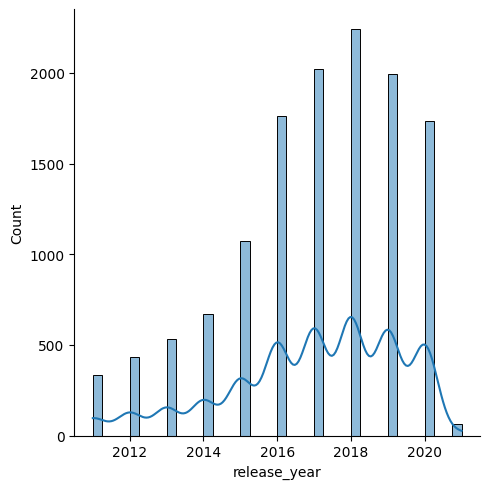

In [50]:
sns.displot(
    df.loc[df['release_year']>2010, 'release_year'], 
    kde=True
)

In [51]:
# duration_anaylsis

fig = px.histogram(
    x= tv_show_df['duration']
)
fig.update_xaxes(categoryorder='total descending')


fig.show()

In [52]:
movie_df['duration']

1         93 min
2         78 min
3         80 min
4        123 min
6         95 min
          ...   
15534     88 min
15535     99 min
15536    111 min
15537     44 min
15539     90 min
Name: duration, Length: 10744, dtype: object

In [53]:
tmp_duration = movie_df['duration'].apply(lambda x: int(x.split(" ")[0]))
tmp_duration

1         93
2         78
3         80
4        123
6         95
        ... 
15534     88
15535     99
15536    111
15537     44
15539     90
Name: duration, Length: 10744, dtype: int64

In [54]:
movie_df.loc[tmp_duration.loc[tmp_duration < 90].index, 'duration_bin'] = 'Less than 1.30 hours'

In [55]:
movie_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,genre,duration_bin
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,"[Dramas, International Movies]",NaN
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,"[Horror Movies, International Movies]",Less than 1.30 hours
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,"[Action & Adventure, Independent Movies, Sci-F...",Less than 1.30 hours
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,[Dramas],NaN
6,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,June,Adults,"[Horror Movies, International Movies]",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,s7782,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,Older Kids,"[Children & Family Movies, Comedies]",Less than 1.30 hours
15535,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,"[Dramas, International Movies]",NaN
15536,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,"[Dramas, International Movies, Music & Musicals]",NaN
15537,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,"[Documentaries, International Movies, Music & ...",Less than 1.30 hours


In [56]:
movie_df.loc[
    tmp_duration.loc[(tmp_duration >= 90) &(tmp_duration < 150)
                    ].index, 'duration_bin'] = 'More than 1.30 hours - less than 2.30 hours'

movie_df.loc[
    tmp_duration.loc[tmp_duration >= 150].index, 'duration_bin'] = 'More than 2.30 hours'

In [57]:
movie_df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,genre,duration_bin
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December,Adults,"[Dramas, International Movies]",More than 1.30 hours - less than 2.30 hours
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December,Adults,"[Horror Movies, International Movies]",Less than 1.30 hours
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November,Teens,"[Action & Adventure, Independent Movies, Sci-F...",Less than 1.30 hours
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January,Teens,[Dramas],More than 1.30 hours - less than 2.30 hours
6,s7,Movie,122,Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020,June,Adults,"[Horror Movies, International Movies]",More than 1.30 hours - less than 2.30 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15534,s7782,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,Older Kids,"[Children & Family Movies, Comedies]",Less than 1.30 hours
15535,s7783,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,October,Adults,"[Dramas, International Movies]",More than 1.30 hours - less than 2.30 hours
15536,s7784,Movie,Zubaan,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,March,Teens,"[Dramas, International Movies, Music & Musicals]",More than 1.30 hours - less than 2.30 hours
15537,s7785,Movie,Zulu Man in Japan,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,September,Adults,"[Documentaries, International Movies, Music & ...",Less than 1.30 hours


In [58]:
fig = px.histogram(x=movie_df['duration_bin'], color=movie_df['duration_bin'])

fig

/Users/ihelshal/miniconda3/lib/python3.10/site-packages/plotly/express/_core.py:1980: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [61]:
sample = movie_df[['type', 'country','target_ages','year_added']]
sample.to_csv('final_ouput.csv',index=False)

In [63]:
sample.dtypes

type           object
country        object
target_ages    object
year_added     object
dtype: object

In [ ]:
df.loc[df['country']==value]